Example 2
=========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

The data in `data-auto.csv` is a popular dataset of car characteristics. We will be looking at the horsepower and miles per gallon (MPG) obtained by these cars. The model we will consider in this notebook is a simple linear regression:

$$
\text{mpg}_{i} = \alpha + \beta \text{horsepower}_{i} + \epsilon_{i}
$$

where the $\epsilon_{i}$ are IID normal fluctuations. We will estimate the parameters $\alpha$ and $\beta$.

In [3]:
df = pd.read_csv("data-auto.csv")

y = df["mpg"].to_numpy()
x = df["horsepower"].to_numpy()
y_bar = y.mean()
x_bar = x.mean()

### Question

Plot the horsepower and MPG, describe the relationship between these variables.

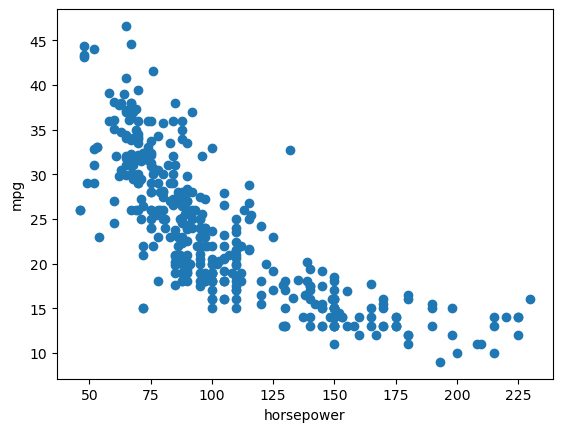

In [3]:
# plot x versus y
plt.plot(x, y, 'o')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

### Question

Using the formula you saw in lectures, calculate the least squares estimates $\hat{\beta}$ and $\hat{\alpha}$

In [7]:
beta_hat = np.dot((x-x_bar), (y-y_bar)) / np.dot((x-x_bar), (x-x_bar))
alpha_hat = y_bar - beta_hat * x_bar

print(f"{alpha_hat=}")
print(f"{beta_hat=}")

alpha_hat=39.935861021170474
beta_hat=-0.15784473335365368


### Question

Using your parameter estimates, calculate the expected values for the MPG, $\hat{y}_{i}$, and the residuals, $e_{i}$.

In [8]:
y_hat = alpha_hat + beta_hat * x
residuals = y - y_hat

### Question

Plot the model fit and the residuals. Are the assumptions (linearity, constant variance and independenc) of the model valid? What does the model predict would be the MPG for a car with the power of 400 horses?

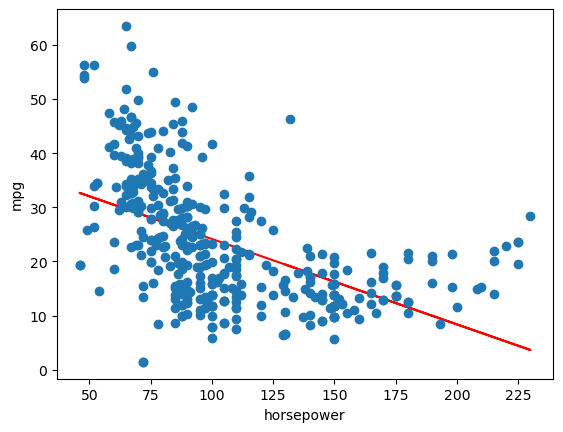

In [10]:
# plot line for y_hat
plt.plot(x, y_hat, 'r-')
# add residuals to plot
plt.plot(x, y + residuals, 'o')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()



In [13]:
# expected mpg when horsepower = 400
print(f"expected mpg when horsepower = 400: {alpha_hat + beta_hat * 400:.2f} mpg")

expected mpg when horsepower = 400: -23.20 mpg


### Question

Calculate the correlation coeffient, and $R^{2}$.

In [14]:
correlation_coefficient = np.corrcoef(x, y)[0, 1]
R2 = correlation_coefficient ** 2
print(f"{R2=}")
print(f"{correlation_coefficient=}")

R2=0.6059482578894346
correlation_coefficient=-0.7784267838977759


### Question

Calculate the confidence intervals on your estimates. Is the result significant?

In [19]:

# confidence interval for beta_hat
RSS = np.dot(residuals, residuals)
beta_hat_se = np.sqrt(RSS / (len(x) - 2) / np.dot((x-x_bar), (x-x_bar)))
beta_hat_t = stats.t.ppf(0.975, len(x) - 2)
beta_hat_ci = (beta_hat - beta_hat_t * beta_hat_se, beta_hat + beta_hat_t * beta_hat_se)
print(f"{beta_hat_ci=}")
print(f"{beta_hat_se=}")

alpha_hat_ci=(39.935766530001416, 39.93595551233953)
alpha_hat_se=4.806105247674378e-05
beta_hat_ci=(-0.17051700846435702, -0.14517245824295033)
beta_hat_se=0.0064455005176850344


### `statsmodels`

We are finally ready to use the `statsmodel` package. In the following code we perform ordinary least squares regression and print out a summary. You can see that all of the estimates agree with those we calculated above.

In [17]:
my_lm = smf.ols("mpg ~ horsepower", df).fit()

my_lm_summary = my_lm.summary()

my_lm_summary.tables[1].data

[['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'],
 ['Intercept',
  '   39.9359',
  '    0.717',
  '   55.660',
  ' 0.000',
  '   38.525',
  '   41.347'],
 ['horsepower',
  '   -0.1578',
  '    0.006',
  '  -24.489',
  ' 0.000',
  '   -0.171',
  '   -0.145']]